# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [9]:
def build_mlp(input_shape, output_units=10, num_neurons= [256,128,64]):
    """
    Build your own model
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation ='relu', name= 'hidden_layer'+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation ='relu', name= 'hidden_layer'+str(i+1))(x)
    output_layer= keras.layers.Dense(units=output_units, activation ='softmax',name='output_layer')(x)
    
    model= keras.models.Model(inputs= [input_layer],outputs=[output_layer])
    return model

In [13]:
## 超參數設定
"""
Set your required experiment parameters
"""
Learning_rate=[1e-1,1e-2,1e-3,1e-4]
Batch_size=256
Epochs=25
Momentum=0.95

In [14]:
#RMSprop
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for lr in Learning_rate:
    keras.backend.clear_session()#清掉舊圖
    print('Experiment_with_lr %.6f' %(lr))
    model = build_mlp(x_train.shape[1:])
    optimizer = keras.optimizers.RMSprop(lr=lr, epsilon= None, decay=0.0)
    model.compile(loss= 'categorical_crossentropy', metrics=['accuracy'],optimizer=optimizer)
    
    model.fit(x_train, y_train,
             epochs=Epochs,
             batch_size=Batch_size,
             validation_data=(x_test,y_test),
             shuffle= True)
    #用 dictionary collect result
    train_loss = model.history.history['loss']
    valid_loss = model.history.history['val_loss']
    train_acc = model.history.history['acc']
    valid_acc = model.history.history['val_acc']
    
    exp_lr = 'exp-lr-%s' %str(lr)
    results[exp_lr]={'train-loss':train_loss,
                    'vaild-loss':valid_loss,
                    'train-acc':train_acc,
                    'valid-acc':valid_acc}

Experiment_with_lr 0.100000
Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 8s 156us/step - loss: 14.4458 - acc: 0.0999 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/25
50000/50000 [==============================] - 8s 153us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/25
50000/50000 [==============================] - 7s 149us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/25
50000/50000 [==============================] - 8s 155us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/25
50000/50000 [==============================] - 8s 157us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/25
50000/50000 [==============================] - 8s 159us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/25
50000/50000 [==============================] - 8s 152us/step - loss: 14

Epoch 8/25
50000/50000 [==============================] - 7s 145us/step - loss: 1.5655 - acc: 0.4445 - val_loss: 1.7006 - val_acc: 0.4014
Epoch 9/25
50000/50000 [==============================] - 8s 150us/step - loss: 1.5374 - acc: 0.4516 - val_loss: 1.6875 - val_acc: 0.3907
Epoch 10/25
50000/50000 [==============================] - 7s 146us/step - loss: 1.5089 - acc: 0.4647 - val_loss: 1.6165 - val_acc: 0.4310
Epoch 11/25
50000/50000 [==============================] - 8s 150us/step - loss: 1.4891 - acc: 0.4698 - val_loss: 1.6605 - val_acc: 0.4196
Epoch 12/25
50000/50000 [==============================] - 7s 145us/step - loss: 1.4682 - acc: 0.4781 - val_loss: 1.5421 - val_acc: 0.4575
Epoch 13/25
50000/50000 [==============================] - 8s 153us/step - loss: 1.4492 - acc: 0.4828 - val_loss: 1.5236 - val_acc: 0.4572
Epoch 14/25
50000/50000 [==============================] - 7s 146us/step - loss: 1.4344 - acc: 0.4895 - val_loss: 1.5213 - val_acc: 0.4591
Epoch 15/25
50000/50000 [====

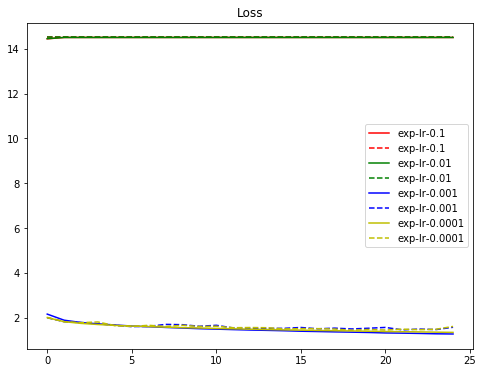

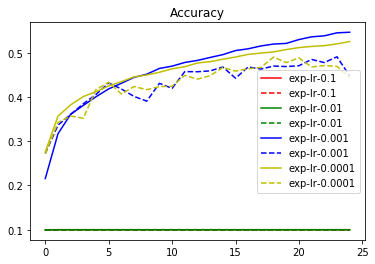

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
color_bar=['r','g','b','y']
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])), results[cond]['train-loss'], '-', label=cond, color = color_bar[i])
    plt.plot(range(len(results[cond]['vaild-loss'])), results[cond]['vaild-loss'],'--',label=cond,color =color_bar[i])
plt.title('Loss')
plt.legend()
plt.show()

for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])), results[cond]['train-acc'], '-', label=cond, color = color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])), results[cond]['valid-acc'],'--',label=cond,color =color_bar[i])
plt.title('Accuracy')
plt.legend()
plt.show()

In [21]:
#Adam
for lr in Learning_rate:
    keras.backend.clear_session()#清掉舊圖
    print('Experiment_with_lr %.6f' %(lr))
    model = build_mlp(x_train.shape[1:])
    optimizer = keras.optimizers.Adam(lr=lr, epsilon= None, decay=0.0)
    model.compile(loss= 'categorical_crossentropy', metrics=['accuracy'],optimizer=optimizer)
    
    model.fit(x_train, y_train,
             epochs=Epochs,
             batch_size=Batch_size,
             validation_data=(x_test,y_test),
             shuffle= True)
    #用 dictionary collect result
    train_loss = model.history.history['loss']
    valid_loss = model.history.history['val_loss']
    train_acc = model.history.history['acc']
    valid_acc = model.history.history['val_acc']
    
    exp_lr = 'exp-lr-%s' %str(lr)
    results[exp_lr]={'train-loss':train_loss,
                    'vaild-loss':valid_loss,
                    'train-acc':train_acc,
                    'valid-acc':valid_acc}

Experiment_with_lr 0.100000
Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 13s 263us/step - loss: 14.4478 - acc: 0.0997 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/25
50000/50000 [==============================] - 9s 189us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/25
50000/50000 [==============================] - 9s 182us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/25
50000/50000 [==============================] - 9s 174us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/25
50000/50000 [==============================] - 10s 196us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/25
50000/50000 [==============================] - 9s 172us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/25
50000/50000 [==============================] - 10s 193us/step - loss:

50000/50000 [==============================] - 8s 165us/step - loss: 1.4607 - acc: 0.4807 - val_loss: 1.4839 - val_acc: 0.4712
Epoch 8/25
50000/50000 [==============================] - 9s 173us/step - loss: 1.4346 - acc: 0.4879 - val_loss: 1.4874 - val_acc: 0.4703
Epoch 9/25
50000/50000 [==============================] - 8s 167us/step - loss: 1.4097 - acc: 0.4984 - val_loss: 1.4536 - val_acc: 0.4836
Epoch 10/25
50000/50000 [==============================] - 9s 172us/step - loss: 1.3794 - acc: 0.5102 - val_loss: 1.4812 - val_acc: 0.4720
Epoch 11/25
50000/50000 [==============================] - 8s 169us/step - loss: 1.3614 - acc: 0.5136 - val_loss: 1.4357 - val_acc: 0.4852
Epoch 12/25
50000/50000 [==============================] - 8s 169us/step - loss: 1.3413 - acc: 0.5217 - val_loss: 1.4246 - val_acc: 0.4941
Epoch 13/25
50000/50000 [==============================] - 9s 176us/step - loss: 1.3233 - acc: 0.5269 - val_loss: 1.4728 - val_acc: 0.4844
Epoch 14/25
50000/50000 [================

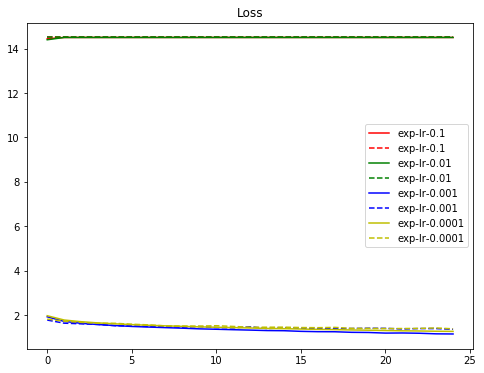

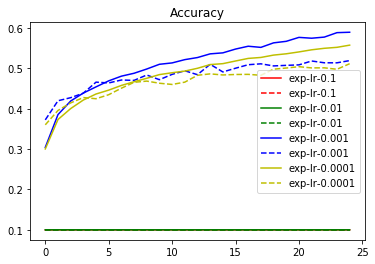

In [22]:
"""
將實驗結果繪出
"""
color_bar=['r','g','b','y']
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])), results[cond]['train-loss'], '-', label=cond, color = color_bar[i])
    plt.plot(range(len(results[cond]['vaild-loss'])), results[cond]['vaild-loss'],'--',label=cond,color =color_bar[i])
plt.title('Loss')
plt.legend()
plt.show()

for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])), results[cond]['train-acc'], '-', label=cond, color = color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])), results[cond]['valid-acc'],'--',label=cond,color =color_bar[i])
plt.title('Accuracy')
plt.legend()
plt.show()

In [24]:
#Adam(change num_neurons) 
def build_mlp_1(input_shape, output_units=10, num_neurons= [512,256,128]):
    """
    Build your own model
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation ='relu', name= 'hidden_layer'+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation ='relu', name= 'hidden_layer'+str(i+1))(x)
    output_layer= keras.layers.Dense(units=output_units, activation ='softmax',name='output_layer')(x)
    
    model= keras.models.Model(inputs= [input_layer],outputs=[output_layer])
    return model

for lr in Learning_rate:
    keras.backend.clear_session()#清掉舊圖
    print('Experiment_with_lr %.6f' %(lr))
    model = build_mlp_1(x_train.shape[1:])
    optimizer = keras.optimizers.Adam(lr=lr, epsilon= None, decay=0.0)
    model.compile(loss= 'categorical_crossentropy', metrics=['accuracy'],optimizer=optimizer)
    
    model.fit(x_train, y_train,
             epochs=Epochs,
             batch_size=Batch_size,
             validation_data=(x_test,y_test),
             shuffle= True)
    #用 dictionary collect result
    train_loss = model.history.history['loss']
    valid_loss = model.history.history['val_loss']
    train_acc = model.history.history['acc']
    valid_acc = model.history.history['val_acc']
    
    exp_lr = 'exp-lr-%s' %str(lr)
    results[exp_lr]={'train-loss':train_loss,
                    'vaild-loss':valid_loss,
                    'train-acc':train_acc,
                    'valid-acc':valid_acc}

Experiment_with_lr 0.100000
Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 20s 405us/step - loss: 14.4454 - acc: 0.0999 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/25
50000/50000 [==============================] - 21s 417us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/25
50000/50000 [==============================] - 22s 439us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/25
50000/50000 [==============================] - 19s 371us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/25
50000/50000 [==============================] - 16s 311us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/25
50000/50000 [==============================] - 17s 331us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/25
50000/50000 [==============================] - 17s 335us/step - l

50000/50000 [==============================] - 16s 310us/step - loss: 1.4347 - acc: 0.4879 - val_loss: 1.4957 - val_acc: 0.4640
Epoch 8/25
50000/50000 [==============================] - 16s 310us/step - loss: 1.4036 - acc: 0.4977 - val_loss: 1.4465 - val_acc: 0.4816
Epoch 9/25
50000/50000 [==============================] - 16s 311us/step - loss: 1.3788 - acc: 0.5078 - val_loss: 1.4492 - val_acc: 0.4848
Epoch 10/25
50000/50000 [==============================] - 16s 320us/step - loss: 1.3542 - acc: 0.5166 - val_loss: 1.4262 - val_acc: 0.4935
Epoch 11/25
50000/50000 [==============================] - 16s 312us/step - loss: 1.3243 - acc: 0.5274 - val_loss: 1.4101 - val_acc: 0.5023
Epoch 12/25
50000/50000 [==============================] - 16s 312us/step - loss: 1.3047 - acc: 0.5349 - val_loss: 1.4303 - val_acc: 0.4950
Epoch 13/25
50000/50000 [==============================] - 16s 311us/step - loss: 1.2819 - acc: 0.5438 - val_loss: 1.4349 - val_acc: 0.4900
Epoch 14/25
50000/50000 [=========

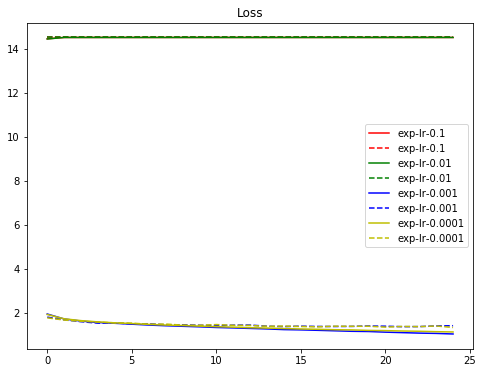

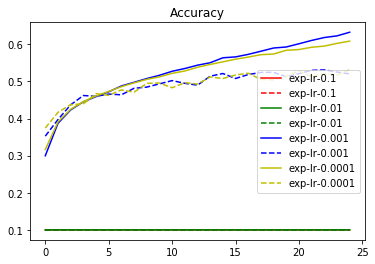

In [25]:
"""
將實驗結果繪出
"""
color_bar=['r','g','b','y']
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])), results[cond]['train-loss'], '-', label=cond, color = color_bar[i])
    plt.plot(range(len(results[cond]['vaild-loss'])), results[cond]['vaild-loss'],'--',label=cond,color =color_bar[i])
plt.title('Loss')
plt.legend()
plt.show()

for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])), results[cond]['train-acc'], '-', label=cond, color = color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])), results[cond]['valid-acc'],'--',label=cond,color =color_bar[i])
plt.title('Accuracy')
plt.legend()
plt.show()

In [ ]:
#1."Adam"的優化效果似乎比"RMSprop"好
#2.num_nerons[512,256,128]比[256,128,64]好